In [1]:
#-*-coding:utf-8-*-

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)
color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')

## 습도, 토양수분 데이터 전처리(2019년~)

In [3]:
df = pd.read_excel('양파_토양수분.xlsx')
df

,date_time,0.5M 평균 습도(%),1.5M 평균 습도(%),4.0M 평균 습도(%),10CM 일 토양수분(%),20CM 일 토양수분(%),30CM 일 토양수분(%),50CM 일 토양수분(%)
0,2019-01-01,41.0,48.0,42.0,12.0,16.0,16.0,12.0
1,2019-01-02,43.0,48.0,40.0,13.0,16.0,16.0,12.0
2,2019-01-03,43.0,47.0,40.0,13.0,16.0,16.0,11.0
3,2019-01-04,47.0,51.0,42.0,12.0,16.0,16.0,11.0
4,2019-01-05,47.0,53.0,45.0,13.0,16.0,16.0,11.0
...,...,...,...,...,...,...,...,...
1449,2022-12-27,67.0,64.0,63.0,4.0,11.0,13.0,18.0
1450,2022-12-28,66.0,62.0,63.0,5.0,11.0,13.0,18.0
1451,2022-12-29,57.0,55.0,54.0,5.0,11.0,12.0,18.0
1452,2022-12-30,77.0,73.0,72.0,5.0,11.0,12.0,18.0


#### 얕은 평균 토양 수분 컬럼 세분화 및 일부 제거

In [4]:
# 얕은평균토양수분을 새로운 컬럼으로 추가하기
df['얕은평균토양수분'] = df[['10CM 일 토양수분(%)', '20CM 일 토양수분(%)', '30CM 일 토양수분(%)']].mean(axis=1)


# 필요없는 컬럼 제거
# 1.5M, 4.0M 평균 습도(%) -> 양파 자라는 깊이가 아님
columns_to_drop = ['1.5M 평균 습도(%)', '4.0M 평균 습도(%)', '10CM 일 토양수분(%)', '20CM 일 토양수분(%)', '30CM 일 토양수분(%)']
df = df.drop(columns=columns_to_drop)

df.head()

,date_time,0.5M 평균 습도(%),50CM 일 토양수분(%),얕은평균토양수분
0,2019-01-01,41.0,12.0,14.666667
1,2019-01-02,43.0,12.0,15.000000
2,2019-01-03,43.0,11.0,15.000000
3,2019-01-04,47.0,11.0,14.666667
4,2019-01-05,47.0,11.0,15.000000


In [5]:
# 날짜 범위가 '2019-01-01'에서 '2022-12-31'인 새 데이터 프레임 생성
new_date_range = pd.date_range(start='2019-01-01', end='2022-12-31', name='date_time')
new_withnull_df = pd.DataFrame({'date_time': new_date_range})

# 새 데이터 프레임을 기존 데이터 프레임과 병합
moist_df = pd.merge(new_withnull_df, df, on='date_time', how='left')

# date_time을 기준으로 데이터 프레임 정렬
moist_df = moist_df.sort_values('date_time').reset_index(drop=True)

In [6]:
df.shape

(1454, 4)

#### NULL 값 처리 전 데이터 확인

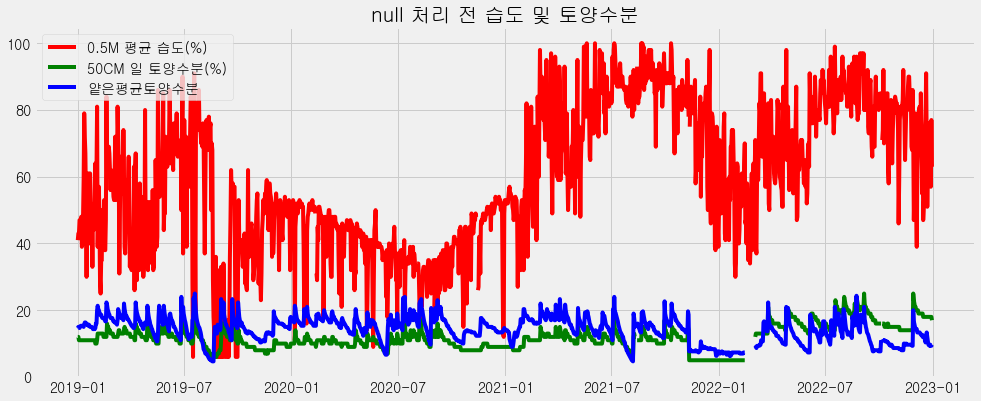

In [7]:
#### 원본데이터는 null 값 존재

# 원하는 너비 및 높이 설정
fig, ax = plt.subplots(figsize=(15, 6))

# plot 표시
ax.plot(df['date_time'], df['0.5M 평균 습도(%)'], 'r')
ax.plot(df['date_time'], df['50CM 일 토양수분(%)'], 'g')
ax.plot(df['date_time'], df['얕은평균토양수분'], 'b')

# 플롯 제목 및 범례 설정
ax.set_title('null 처리 전 습도 및 토양수분')
ax.legend(['0.5M 평균 습도(%)', '50CM 일 토양수분(%)', '얕은평균토양수분'])

# 플롯 표시
plt.show()

In [8]:
moist_df.shape

(1461, 4)

In [9]:
moist_df.isnull().sum()

date_time          0
0.5M 평균 습도(%)     15
50CM 일 토양수분(%)    25
얕은평균토양수분          25
dtype: int64

In [10]:
#### 빈 값 채움
new_moist_df = moist_df.interpolate()

#### NULL 값 처리 이후 데이터 확인 (습도 및 토양수분 plot)

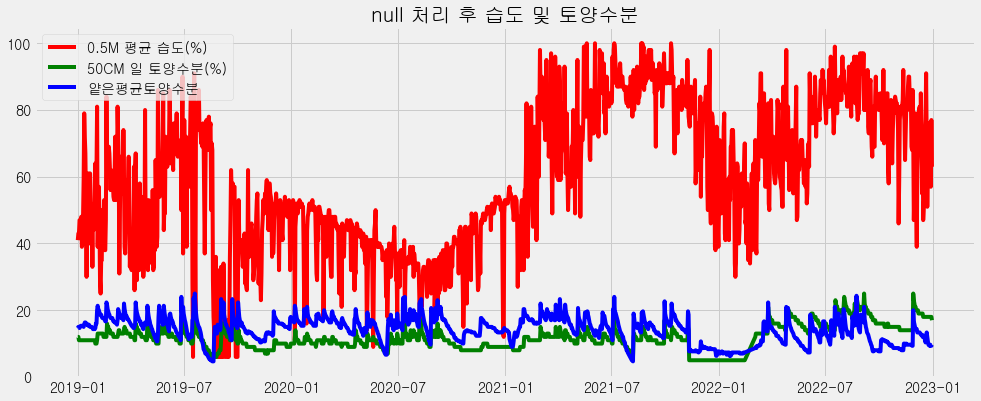

In [11]:
# 원하는 너비 및 높이 설정
fig, ax = plt.subplots(figsize=(15, 6))

# plot 표시
ax.plot(new_moist_df['date_time'], new_moist_df['0.5M 평균 습도(%)'], 'r')
ax.plot(new_moist_df['date_time'], new_moist_df['50CM 일 토양수분(%)'], 'g')
ax.plot(new_moist_df['date_time'], new_moist_df['얕은평균토양수분'], 'b')

# 플롯 제목 및 범례 설정
ax.set_title('null 처리 후 습도 및 토양수분')
ax.legend(['0.5M 평균 습도(%)', '50CM 일 토양수분(%)', '얕은평균토양수분'])

# 플롯 표시
plt.show()

#### 0.5M 평균 습도(%) plot

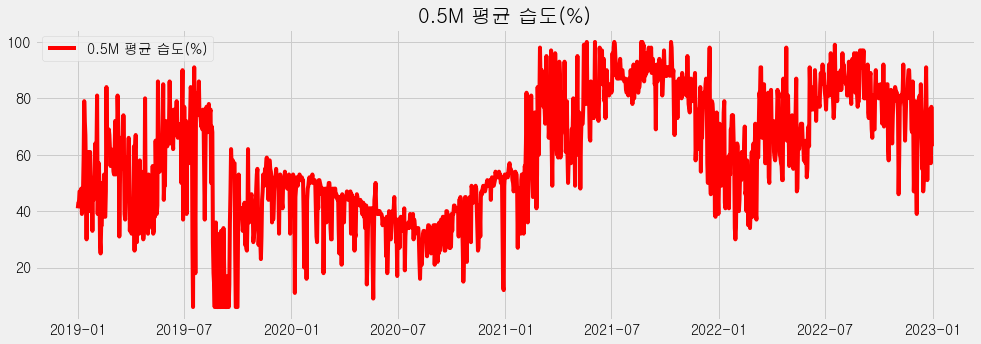

In [12]:
# 원하는 너비 및 높이 설정
fig, ax = plt.subplots(figsize=(15, 5))

# plot 표시
ax.plot(new_moist_df['date_time'], new_moist_df['0.5M 평균 습도(%)'], 'r')

# 플롯 제목 및 범례 설정
ax.set_title('0.5M 평균 습도(%)')
ax.legend(['0.5M 평균 습도(%)'])

# 플롯 표시
plt.show()

#### 50CM 일 토양수분(%) plot

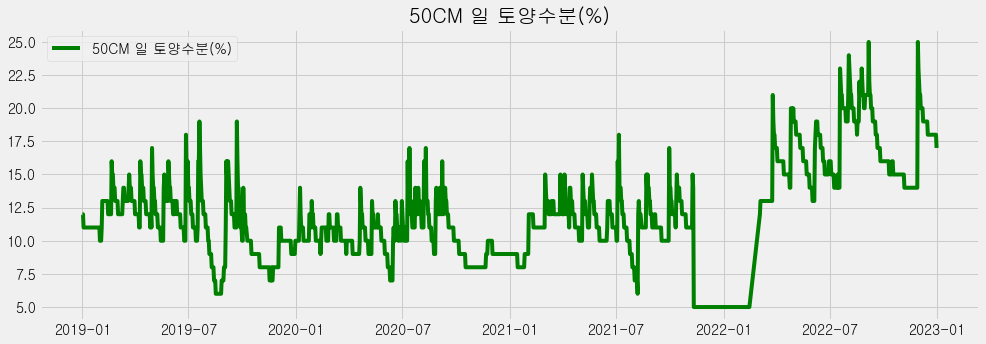

In [13]:
# 원하는 너비 및 높이 설정
fig, ax = plt.subplots(figsize=(15, 5))

# plot 표시
ax.plot(new_moist_df['date_time'], new_moist_df['50CM 일 토양수분(%)'], 'g')

# 플롯 제목 및 범례 설정
ax.set_title('50CM 일 토양수분(%)')
ax.legend(['50CM 일 토양수분(%)'])

# 플롯 표시
plt.show()

#### 얕은평균토양수분 plot

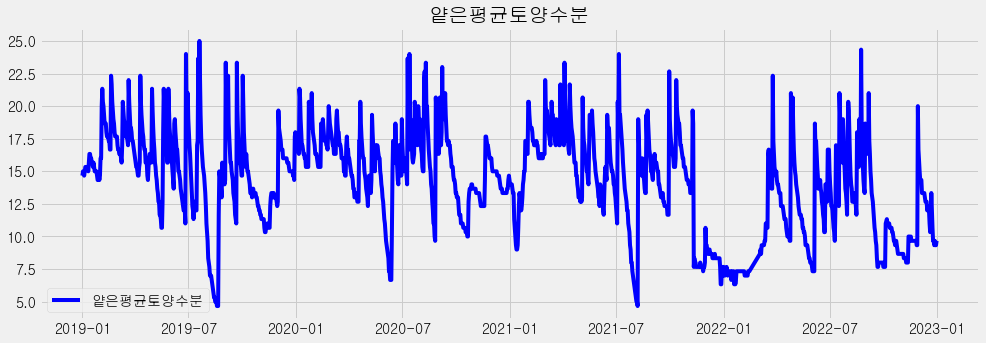

In [14]:
# 원하는 너비 및 높이 설정
fig, ax = plt.subplots(figsize=(15, 5))

# plot 표시
ax.plot(new_moist_df['date_time'], new_moist_df['얕은평균토양수분'], 'b')

# 플롯 제목 및 범례 설정
ax.set_title('얕은평균토양수분')
ax.legend(['얕은평균토양수분'])

# 플롯 표시
plt.show()

#### 데이터프레임 확인

In [15]:
new_moist_df = new_moist_df.set_index('date_time')
new_moist_df.head()

,0.5M 평균 습도(%),50CM 일 토양수분(%),얕은평균토양수분
date_time,,,
2019-01-01,41.0,12.0,14.666667
2019-01-02,43.0,12.0,15.000000
2019-01-03,43.0,11.0,15.000000
2019-01-04,47.0,11.0,14.666667
2019-01-05,47.0,11.0,15.000000


In [16]:
new_moist_df.to_excel(excel_writer='moist_data.xlsx', sheet_name='전처리완료습도데이터')